In [1]:
%matplotlib inline


# A demo of K-Medoids clustering on the handwritten digits data
In this example we compare different pairwise distance
metrics for K-Medoids.


Automatically created module for IPython interactive environment


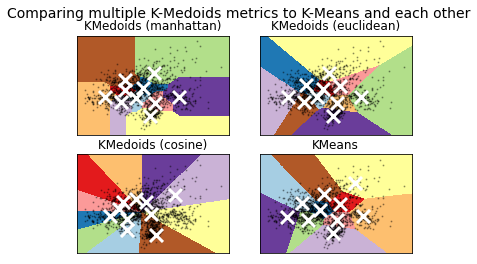

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

print(__doc__)

# Authors: Timo Erkkilä <timo.erkkila@gmail.com>
#          Antti Lehmussola <antti.lehmussola@gmail.com>
#          Kornel Kiełczewski <kornel.mail@gmail.com>
# License: BSD 3 clause

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
n_digits = len(np.unique(digits.target))

reduced_data = PCA(n_components=2).fit_transform(data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure()
plt.clf()

plt.suptitle(
    "Comparing multiple K-Medoids metrics to K-Means and each other",
    fontsize=14,
)


selected_models = [
    (
        KMedoids(metric="manhattan", n_clusters=n_digits),
        "KMedoids (manhattan)",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=n_digits),
        "KMedoids (euclidean)",
    ),
    (KMedoids(metric="cosine", n_clusters=n_digits), "KMedoids (cosine)"),
    (KMeans(n_clusters=n_digits), "KMeans"),
]

plot_rows = int(np.ceil(len(selected_models) / 2.0))
plot_cols = 2

for i, (model, description) in enumerate(selected_models):

    # Obtain labels for each point in mesh. Use last trained model.
    model.fit(reduced_data)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(
        reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2, alpha=0.3
    )
    # Plot the centroids as a white X
    centroids = model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

plt.show()